In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWa

images/car.jpg


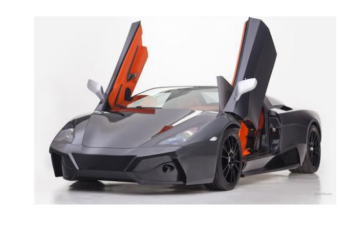

sports car, sport car (score = 0.73737)
racer, race car, racing car (score = 0.03502)
chain saw, chainsaw (score = 0.03196)
convertible (score = 0.02110)
lawn mower, mower (score = 0.00786)

images/car.png


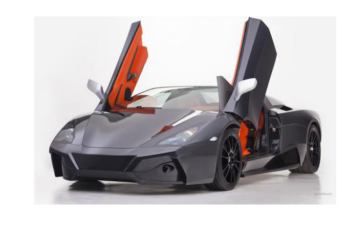

sports car, sport car (score = 0.77422)
racer, race car, racing car (score = 0.03556)
chain saw, chainsaw (score = 0.02202)
convertible (score = 0.01721)
lawn mower, mower (score = 0.00641)

images/cat.jpg


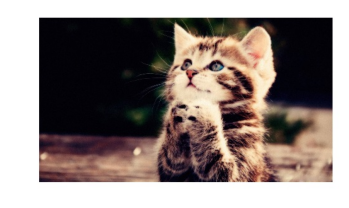

Egyptian cat (score = 0.40202)
tabby, tabby cat (score = 0.28264)
tiger cat (score = 0.12482)
lynx, catamount (score = 0.07433)
meerkat, mierkat (score = 0.00750)

images/cat.png


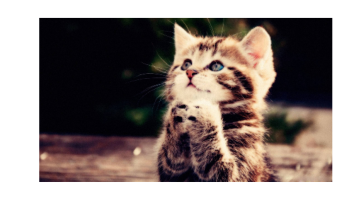

tabby, tabby cat (score = 0.38295)
Egyptian cat (score = 0.29960)
tiger cat (score = 0.16846)
lynx, catamount (score = 0.03874)
meerkat, mierkat (score = 0.00615)

images/dog.jpg


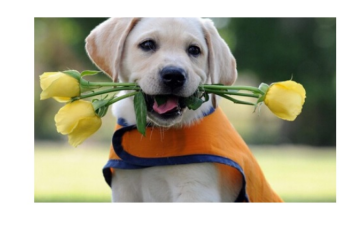

Labrador retriever (score = 0.96155)
golden retriever (score = 0.00757)
tennis ball (score = 0.00399)
kuvasz (score = 0.00108)
rapeseed (score = 0.00084)

images/dog.png


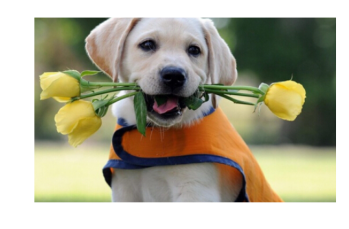

Labrador retriever (score = 0.96085)
golden retriever (score = 0.00897)
tennis ball (score = 0.00373)
kuvasz (score = 0.00115)
rapeseed (score = 0.00096)

images/plane.jpg


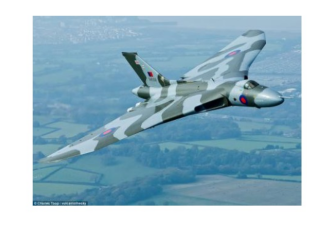

warplane, military plane (score = 0.83126)
wing (score = 0.03807)
aircraft carrier, carrier, flattop, attack aircraft carrier (score = 0.01308)
missile (score = 0.01035)
projectile, missile (score = 0.01022)

images/plane.png


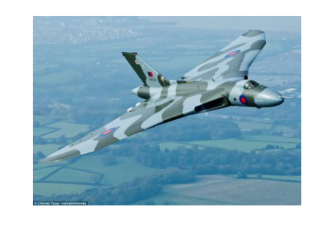

warplane, military plane (score = 0.80901)
wing (score = 0.04129)
aircraft carrier, carrier, flattop, attack aircraft carrier (score = 0.01420)
projectile, missile (score = 0.01254)
missile (score = 0.01171)

images/qqbaby.jpg


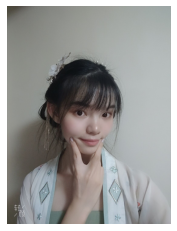

kimono (score = 0.71787)
pajama, pyjama, pj's, jammies (score = 0.05582)
lab coat, laboratory coat (score = 0.04608)
stole (score = 0.01753)
handkerchief, hankie, hanky, hankey (score = 0.01123)

images/qqbaby2.jpg


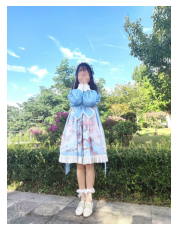

overskirt (score = 0.25097)
miniskirt, mini (score = 0.13944)
stole (score = 0.05721)
trench coat (score = 0.04930)
hoopskirt, crinoline (score = 0.03961)

images/seaside.jpg


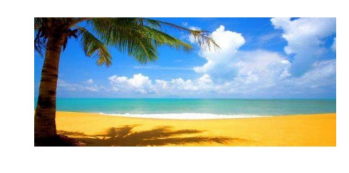

seashore, coast, seacoast, sea-coast (score = 0.76459)
sandbar, sand bar (score = 0.15321)
lakeside, lakeshore (score = 0.02736)
sarong (score = 0.00759)
web site, website, internet site, site (score = 0.00318)

images/seaside.png


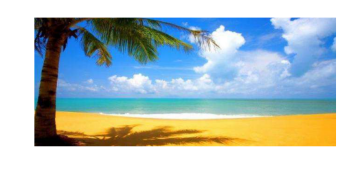

seashore, coast, seacoast, sea-coast (score = 0.73181)
sandbar, sand bar (score = 0.17673)
lakeside, lakeshore (score = 0.03621)
sarong (score = 0.00797)
web site, website, internet site, site (score = 0.00339)

images/sleep_cat.jpg


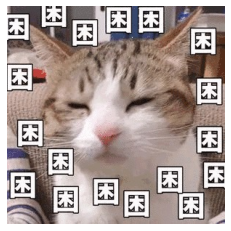

Egyptian cat (score = 0.32262)
tabby, tabby cat (score = 0.21577)
crossword puzzle, crossword (score = 0.09362)
tiger cat (score = 0.07990)
lynx, catamount (score = 0.01997)



In [4]:
class NodeLookup(object):
    def __init__(self):  
        label_lookup_path = 'inception_model/imagenet_2012_challenge_label_map_proto.pbtxt'   
        uid_lookup_path = 'inception_model/imagenet_synset_to_human_label_map.txt'
        self.node_lookup = self.load(label_lookup_path, uid_lookup_path)

    def load(self, label_lookup_path, uid_lookup_path):
        # 加载分类字符串n********对应分类名称的文件
        proto_as_ascii_lines = tf.gfile.GFile(uid_lookup_path).readlines()
        uid_to_human = {}#字典，用于存储编号和名称数据
        #一行一行读取数据
        for line in proto_as_ascii_lines :
            #去掉换行符
            line=line.strip('\n')
            #按照'\t'分割
            parsed_items = line.split('\t')
            #获取分类编号
            uid = parsed_items[0]
            #获取分类名称
            human_string = parsed_items[1]
            #保存编号字符串n********与分类名称映射关系
            uid_to_human[uid] = human_string

        # 加载分类字符串n********对应分类编号1-1000的文件
        proto_as_ascii = tf.gfile.GFile(label_lookup_path).readlines()
        node_id_to_uid = {}
        for line in proto_as_ascii:
            if line.startswith('  target_class:'):
                #获取分类编号1-1000
                target_class = int(line.split(': ')[1])
            if line.startswith('  target_class_string:'):
                #获取编号字符串n********
                target_class_string = line.split(': ')[1]
                #保存分类编号1-1000与编号字符串n********映射关系
                node_id_to_uid[target_class] = target_class_string[1:-2]

        #建立分类编号1-1000对应分类名称的映射关系
        node_id_to_name = {}
        for key, val in node_id_to_uid.items():
            #获取分类名称
            name = uid_to_human[val]
            #建立分类编号1-1000到分类名称的映射关系
            node_id_to_name[key] = name
        return node_id_to_name

    #传入分类编号1-1000返回分类名称
    def id_to_string(self, node_id):
        if node_id not in self.node_lookup:
            return ''
        return self.node_lookup[node_id]

#通过训练，输入一张图片数据后，会返回一个编号（总共一千个编号），吧编号带入id_to_string函数会输出对应的名称

#创建一个图来存放google训练好的模型
with tf.gfile.FastGFile('inception_model/classify_image_graph_def.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')


with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')#给图起一个名字
    #遍历目录
    for root,dirs,files in os.walk('images/'):
        for file in files:
            #载入图片
            image_data = tf.gfile.FastGFile(os.path.join(root,file), 'rb').read()#root路径，file名称
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})#图片格式是jpg格式
            predictions = np.squeeze(predictions)#把结果转为1维数据

            #打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            #显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            #排序，因为每一张图片会输出一千个值（概率），将概率大的排在前面
            top_k = predictions.argsort()[-5:][::-1]#取倒数第五个值到最后一个值，在做一个倒叙，概率从大到小排序
            node_lookup = NodeLookup()#实现NodeLookup（）类
            for node_id in top_k:     
                #获取分类名称
                human_string = node_lookup.id_to_string(node_id)
                #获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()